In [5]:

# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [15]:
# Load data into a dataframe
dfCovid = pd.read_csv("new.csv")
dfCovid.head()
#dfCovid.tail()

,date,state_id,policy_type,deathIncrease,positiveIncrease,negativeIncrease,hospitalizedIncrease,recovered
0,20-Apr,AK,Shelter in Place,6,209,0,25,1855
1,NaN,AL,Shelter in Place,234,5587,71990,978,0
2,NaN,CA,Shelter in Place,1829,41435,-21772,0,0
3,NaN,CO,Mandate Face Mask Use By All Individuals In Pu...,97,1843,7273,259,0
4,NaN,NaN,Shelter in Place,439,7912,25884,1614,0


Text(0.5, 1.0, 'Distribution of number of increased monthly death cases')

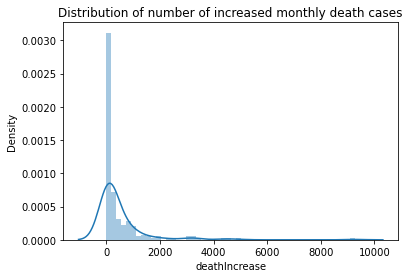

In [16]:
# distribution of deathIncrease 
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.distplot(dfCovid['deathIncrease'])


#plt.hist(dfCovid['deathIncrease'], color = 'blue', edgecolor = 'black',bins = int(100)) 

plt.title('Distribution of number of increased monthly death cases')

#plt.show()

In [17]:
# rename policy type 

dfCovid.loc[dfCovid['policy_type'] == 'Shelter in Place','policy'] = 2
dfCovid.loc[dfCovid['policy_type'] == 'Mandate Face Mask Use By All Individuals In Public Spaces','policy'] = 3
dfCovid.loc[dfCovid['policy_type'] == 'Mandate Face Mask Use By All Individuals In Public Facing Businesses','policy'] = 0
dfCovid.loc[dfCovid['policy_type'] == 'Mask Requirement','policy'] = 1
dfCovid.tail()

,date,state_id,policy_type,deathIncrease,positiveIncrease,negativeIncrease,hospitalizedIncrease,recovered,policy
206,NaN,LA,Mandate Face Mask Use By All Individuals In Pu...,561,18564,426550,0,4272655,0.0
207,NaN,ND,Mandate Face Mask Use By All Individuals In Pu...,102,10013,29701,305,404502,0.0
208,NaN,NE,Mandate Face Mask Use By All Individuals In Pu...,86,10998,83289,321,888466,0.0
209,NaN,VI,Mask Requirement,6,184,4143,0,34192,1.0
210,NaN,WY,Mandate Face Mask Use By All Individuals In Pu...,13,2106,22781,57,117718,0.0


Text(0.5, 1.0, 'Number of increased monthly death cases with four policy types')

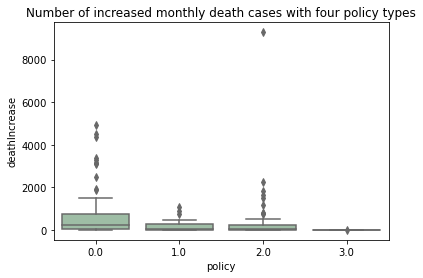

In [18]:


ax = sns.boxplot(x='policy', y='deathIncrease', data=dfCovid, color='#99c2a2')
ax.set_title('Number of increased monthly death cases with four policy types')


In [19]:
# set independent and dependent variables

features=dfCovid[['positiveIncrease','hospitalizedIncrease','recovered','policy']].values

death=dfCovid['deathIncrease']

type(features)
#feature=features.reshape(-1,1)

numpy.ndarray

In [20]:
# train the data with Ridge Regression method

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
rr_model=Ridge()

param_grid = {'alpha': uniform()}

rrsearch=RandomizedSearchCV(estimator=rr_model, param_distributions=param_grid, n_iter=100,cv=5)
rrsearch.fit(features, death)

print(rrsearch.best_score_)
print(rrsearch.best_estimator_.alpha)

0.46532191488081753
0.9992156254294827


In [22]:
from sklearn.linear_model import Lasso

lr_model=Lasso()

param_grid = {'alpha': uniform()}

lrsearch=RandomizedSearchCV(estimator=rr_model, param_distributions=param_grid, n_iter=100,cv=5)
lrsearch.fit(features, death)

print(lrsearch.best_score_)
print(lrsearch.best_estimator_.alpha)


0.46532095999282336
0.993290307767296


In [61]:
dfCovid.head()

,date_x,state_id,policy_type_x,deathIncrease,positiveIncrease,negativeIncrease,hospitalizedIncrease,recovered,policy
0,Apr-20,AK,Shelter in Place,6,209,0,25,1855,4.0
1,NaN,AL,Shelter in Place,234,5587,71990,978,0,4.0
2,NaN,CA,Shelter in Place,1829,41435,-21772,0,0,4.0
3,NaN,CO,Mandate Face Mask Use By All Individuals In Pu...,97,1843,7273,259,0,2.0
4,NaN,NaN,Shelter in Place,439,7912,25884,1614,0,4.0


In [115]:



X=dfCovid[['deathIncrease','positiveIncrease','hospitalizedIncrease','recovered']].values
y=dfCovid[['policy']]

In [117]:
#check model accuracy for k in [1,20]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5899999999999999, 0.6114285714285714, 0.6000000000000001, 0.6085714285714288, 0.6257142857142857, 0.6285714285714287, 0.6628571428571428, 0.6542857142857141, 0.6685714285714286, 0.6514285714285715, 0.6485714285714287, 0.6457142857142857, 0.6414285714285715, 0.6585714285714286, 0.6657142857142857, 0.65, 0.6571428571428571, 0.6471428571428572, 0.6442857142857144, 0.6614285714285715]


In [132]:
# classification with logistic regression classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(X, y)


from sklearn.model_selection import cross_val_score
cur_score_lr = cross_val_score(logreg, X, y, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())


[0.46511628 0.47619048 0.57142857 0.38095238 0.54761905]
0.4882613510520487


In [134]:
# clssification with dicistion tree classifier
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X, y, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.58139535 0.69047619 0.78571429 0.52380952 0.69047619]
0.6543743078626798


In [137]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# gnb.fit(X_train, y_train)

cur_score_gnb = cross_val_score(gnb, X, y, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.51162791 0.52380952 0.26190476 0.19047619 0.35714286]
0.36899224806201547


In [139]:
from sklearn.svm import SVC
svm = SVC()
cur_score_svm = cross_val_score(svm, X, y, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.48837209 0.52380952 0.54761905 0.52380952 0.52380952]
0.521483942414175


In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X, y, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.51162791 0.54761905 0.57142857 0.47619048 0.52380952]
0.5261351052048726


In [2]:
###############################
################################
## New dataset with stringency


# Load data into a dataframe
dfStr= pd.read_csv("new_stringency.csv")
dfStr.head()
#dfCovid.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,...,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,date,deathIncrease
0,United States,USA,North Carolina,US_NC,STATE_WIDE,20200304,0,NaN,NaN,0,...,0.0,0.0,2.08,2.08,2.38,2.38,0.0,0.0,3/4/2020,0
1,United States,USA,North Carolina,US_NC,STATE_WIDE,20200305,0,NaN,NaN,0,...,0.0,0.0,2.08,2.08,2.38,2.38,0.0,0.0,3/5/2020,0
2,United States,USA,North Carolina,US_NC,STATE_WIDE,20200306,0,NaN,NaN,0,...,0.0,0.0,2.08,2.08,2.38,2.38,0.0,0.0,3/6/2020,0
3,United States,USA,North Carolina,US_NC,STATE_WIDE,20200307,0,NaN,NaN,0,...,0.0,0.0,2.08,2.08,2.38,2.38,0.0,0.0,3/7/2020,0
4,United States,USA,North Carolina,US_NC,STATE_WIDE,20200308,0,NaN,NaN,0,...,0.0,0.0,2.08,2.08,2.38,2.38,0.0,0.0,3/8/2020,0


In [42]:
# set independent and dependent variables

strfeatures=dfStr[['GovernmentResponseIndex','StringencyIndex','ContainmentHealthIndex','EconomicSupportIndex']].values

death=dfStr['deathIncrease']

type(features)
#feature=features.reshape(-1,1)

numpy.ndarray

In [43]:
# train the data with Ridge Regression method

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
rr_model=Ridge()

param_grid = {'alpha': uniform()}

rrsearch=RandomizedSearchCV(estimator=rr_model, param_distributions=param_grid, n_iter=100,cv=5)
rrsearch.fit(strfeatures, death)

print(rrsearch.best_score_)
print(rrsearch.best_estimator_.alpha)

-28.29750089278182
0.0011946340866898497


In [3]:
#import preprocessed dataset

dfpre = pd.read_csv("covid_preprocessed.csv")
dfpre.tail()

,Unnamed: 0,date,state,death,deathConfirmed,deathIncrease,hospitalizedCurrently,inIcuCurrently,positive,positiveCasesViral,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
362,362,3/1/2021,NC,11254,9959,42,1319,333,862170,752406,...,56.48,56.48,63.81,63.81,62.6,62.6,62.62,62.62,62.5,62.5
363,363,3/2/2021,NC,11288,9987,34,1353,334,863409,753280,...,56.48,56.48,63.81,63.81,62.6,62.6,62.62,62.62,62.5,62.5
364,364,3/3/2021,NC,11363,10050,75,1303,332,865554,754610,...,56.48,56.48,63.81,63.81,62.6,62.6,62.62,62.62,62.5,62.5
365,365,3/4/2021,NC,11399,10083,36,1290,326,868056,756509,...,56.48,56.48,63.81,63.81,62.6,62.6,62.62,62.62,62.5,62.5
366,366,3/5/2021,NC,11446,10125,47,1226,314,870149,758115,...,56.48,56.48,63.81,63.81,62.6,62.6,62.62,62.62,62.5,62.5


In [16]:

prefeatures=dfpre[['hospitalizedCurrently','inIcuCurrently','policy','StringencyIndex']].values

death=dfpre['deathIncrease']

In [17]:
# train the data with Ridge Regression method

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
rr_model=Ridge()

param_grid = {'alpha': uniform()}

rrsearch=RandomizedSearchCV(estimator=rr_model, param_distributions=param_grid, n_iter=100,cv=5)
rrsearch.fit(prefeatures, death)

print(rrsearch.best_score_)
print(rrsearch.best_estimator_.alpha)

-9.730263658883882
0.9977117113444273


In [ ]:
features1=dfpre[['positiveIncrease','hospitalizedCurrently','policy','GovernmentResponseIndex','StringencyIndex','ContainmentHealthIndex','EconomicSupportIndex']]
death=dfpre['deathIncrease']
bag = BaggingRegressor()


In [24]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(n_estimators=10)
model.fit(features1, death)
print(model.feature_importances_)

[0.42981225 0.42683332 0.0157119  0.04575755 0.03058123 0.04022607
 0.01107768]


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std


features1=dfpre[['positiveIncrease','hospitalizedCurrently','policy','GovernmentResponseIndex','StringencyIndex','ContainmentHealthIndex','EconomicSupportIndex']]
death=dfpre['deathIncrease']
bag = BaggingRegressor()


#scores
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state=1)


scores = cross_val_score(bag, features1, death, cv=cv)
#scores

print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))




NameError: name 'dfpre' is not defined

In [6]:
#############combined dataset
dffinal= pd.read_csv("final.csv")
dffinal.head()
#dfCovid.tail()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,...,H8_Protection of elderly people,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,date,deathIncrease
0,United States,USA,Alaska,US_AK,STATE_WIDE,20200306,0,0,0,0,...,0,0,0,11.11,14.29,8.33,9.52,9.52,3/6/2020,0
1,United States,USA,Alaska,US_AK,STATE_WIDE,20200307,0,0,0,0,...,0,0,0,11.11,14.29,8.33,9.52,9.52,3/7/2020,0
2,United States,USA,Alaska,US_AK,STATE_WIDE,20200308,0,0,0,0,...,0,0,0,11.11,14.29,8.33,9.52,9.52,3/8/2020,0
3,United States,USA,Alaska,US_AK,STATE_WIDE,20200309,0,0,0,0,...,0,0,0,11.11,14.29,8.33,9.52,9.52,3/9/2020,0
4,United States,USA,Alaska,US_AK,STATE_WIDE,20200310,0,0,0,0,...,0,0,0,11.11,14.29,8.33,9.52,9.52,3/10/2020,0


In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
rr_model=Ridge()

param_grid = {'alpha': uniform()}

features_final=dffinal[['ConfirmedCases','StringencyIndex','StringencyLegacyIndex','GovernmentResponseIndex','ContainmentHealthIndex']]
death=dffinal['deathIncrease']
rrsearch=RandomizedSearchCV(estimator=rr_model, param_distributions=param_grid, n_iter=100,cv=5)
rrsearch.fit(features_final, death)

print(rrsearch.best_score_)
print(rrsearch.best_estimator_.alpha)

0.34461332593414695
0.9862314231607469


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(features_final,death,test_size=0.2)

In [23]:

from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train,y_train)

pred = svr_model.predict(X_test)

#print(np.sqrt(mean_squared_error(y_train, pred, squared=False)))
print(r2_score(y_test, pred))

0.21886754734409453


In [25]:



bag = BaggingRegressor()


#scores
cv = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state=1)
scores = cross_val_score(bag, features_final, death, cv=cv)
#scores

print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 0.617 (0.057)


In [40]:
X1=dffinal[['ConfirmedCases','StringencyIndex','GovernmentResponseIndex','ContainmentHealthIndex','deathIncrease']].values
y1=dffinal[['C6_Stay at home requirements']]

In [44]:
#check model accuracy for k in [1,20]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5421531869309053, 0.5176218532404927, 0.556427423674344, 0.5500535618639528, 0.5768612747723622, 0.5647562935190146, 0.5752811997857525, 0.5738885913229781, 0.5776914836636314, 0.575682913765399, 0.5835029459025174, 0.5790037493304767, 0.5876539903588645, 0.5856454204606321, 0.5860471344402784, 0.584708087841457, 0.5869309051955008, 0.5892876272094268, 0.5859132297803964, 0.5853240492769147]


In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#logreg.fit(X, y)


from sklearn.model_selection import cross_val_score
cur_score_lr = cross_val_score(logreg, X1, y1, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.51660418 0.51942138 0.5191535  0.5191535  0.50549156]
0.5159648216352625


In [46]:
from sklearn.tree import DecisionTreeClassifier
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y1, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.46866631 0.47414948 0.53576212 0.5502277  0.56710421]
0.5191819626943698


In [34]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# gnb.fit(X_train, y_train)

cur_score_gnb = cross_val_score(gnb, X1, y1, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.57096947 0.70506295 0.51727833 0.5558532  0.61746585]
0.5933259593104883


In [47]:
from sklearn.svm import SVC
svm = SVC()
cur_score_svm = cross_val_score(svm, X1, y1, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.51847884 0.5191535  0.5191535  0.50093758 0.47495312]
0.506535307857323


In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y1, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.60792716 0.60916153 0.68631128 0.63273507 0.72649344]
0.6525256936964444


In [49]:

y2=dffinal[['C2_Workplace closing']]


In [50]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5174879485806106, 0.4828066416711302, 0.49033208355650776, 0.5044724156400642, 0.4987680771290841, 0.4991162292447777, 0.5013122656668453, 0.4980449919657204, 0.49981253347616494, 0.4993036957686128, 0.5025174076057847, 0.5005891805034816, 0.5031333690412427, 0.4974558114622389, 0.5042849491162291, 0.5007498660953401, 0.5039367970005355, 0.5006695232994108, 0.5048473486877343, 0.5016604177825388]


In [38]:
gnb = GaussianNB()
# gnb.fit(X_train, y_train)

cur_score_gnb = cross_val_score(gnb, X1, y2, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.61301553 0.55183499 0.66836325 0.58826681 0.657648  ]
0.6158257157496415


In [52]:
cur_score_lr = cross_val_score(logreg, X1, y2, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.45366899 0.44200375 0.44146799 0.44012858 0.40235735]
0.43592533249463267


In [53]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y2, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.51901446 0.62577016 0.59014198 0.59148138 0.53790517]
0.5728626298172138


In [54]:
cur_score_svm = cross_val_score(svm, X1, y2, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.49464381 0.50200911 0.32467185 0.48352531 0.43825342]
0.44862069950101235


In [56]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y2, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.59962507 0.66273774 0.75649612 0.75301366 0.67720332]
0.6898151821555343


In [57]:

y3=dffinal[['C1_School closing']]

In [58]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y3, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.6276379217996787, 0.5920728441349759, 0.6426084627745045, 0.6623460096411355, 0.6684788430637386, 0.6705409748259239, 0.6820299946438138, 0.6816282806641671, 0.684413497589716, 0.6865827530798072, 0.6908141403320835, 0.6907070166041779, 0.6910551687198715, 0.6915372254954473, 0.6975361542581682, 0.699437600428495, 0.6940278521692556, 0.697402249598286, 0.7023835029459027, 0.6921264059989287]


In [59]:
gnb = GaussianNB()
# gnb.fit(X_train, y_train)

cur_score_gnb = cross_val_score(gnb, X1, y3, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.59132298 0.64184302 0.60809001 0.6662202  0.56174658]
0.6138445581045786


In [60]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y3, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.58944831 0.66943477 0.63541388 0.66086258 0.62148406]
0.635328719618923


In [61]:
cur_score_lr = cross_val_score(logreg, X1, y3, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.63256561 0.65738012 0.69541923 0.6407715  0.67398875]
0.6600250433638745


In [62]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y3, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.66122121 0.68684704 0.70479507 0.71979641 0.71095634]
0.6967232134363516


In [63]:
cur_score_svm = cross_val_score(svm, X1, y3, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.61435458 0.65550496 0.66461291 0.67773908 0.68952585]
0.6603474763150528


In [65]:
y4=dffinal[['C3_Cancel public events']]

In [66]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y4, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5993304767005891, 0.5651044456347082, 0.5903320835565078, 0.6011247991430102, 0.6136850562399572, 0.6083824317086234, 0.6066416711301553, 0.6120246384574184, 0.6123192287091591, 0.6100160685591859, 0.6114354579539367, 0.6084092126406, 0.6098286020353509, 0.6132565613283341, 0.6084092126405999, 0.6105784681306909, 0.6154525977504017, 0.6168452062131762, 0.6127477236207819, 0.613979646491698]


In [67]:

cur_score_gnb = cross_val_score(gnb, X1, y4, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.6580075  0.63862845 0.62362711 0.60782213 0.66032681]
0.637682399812555


In [68]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y4, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.55382967 0.6520225  0.68363247 0.66327351 0.55799625]
0.6221508797389085


In [69]:
cur_score_lr = cross_val_score(logreg, X1, y4, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.52704874 0.61880525 0.52933298 0.52665417 0.54085186]
0.5485385990494887


In [70]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y4, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.70915908 0.66889901 0.7015805  0.82560943 0.73720868]
0.7284913389188998


In [71]:
cur_score_svm = cross_val_score(svm, X1, y4, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.55918586 0.52343959 0.57621216 0.57353335 0.56388963]
0.5592521196967765


In [73]:
y5=dffinal[['C4_Restrictions on gatherings']]

In [75]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y5, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.4743170862346009, 0.4086234600964113, 0.4546598821638993, 0.4706480985538296, 0.4867702196036422, 0.47731655061596145, 0.4878414568826995, 0.4839314408141403, 0.48730583824317086, 0.48963577932512053, 0.48875200856989826, 0.49408141403320843, 0.4854311730048205, 0.4906534547402249, 0.48626138189609003, 0.4888323513658275, 0.4895822174611677, 0.4859935725763257, 0.4894483128012855, 0.48596679164434925]


In [76]:

cur_score_gnb = cross_val_score(gnb, X1, y5, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.51071237 0.53094026 0.60889365 0.46236271 0.55933565]
0.5344489304916801


In [77]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y5, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())


[0.52169255 0.55478168 0.63112778 0.51272435 0.55263863]
0.5545929979879507


In [78]:
cur_score_lr = cross_val_score(logreg, X1, y5, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.45715051 0.45780873 0.45780873 0.45727297 0.44655773]
0.45531973477048815


In [79]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y5, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.57150509 0.57433699 0.59067774 0.51942138 0.67854273]
0.5868967851546543


In [80]:
cur_score_svm = cross_val_score(svm, X1, y5, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.45741832 0.45780873 0.45780873 0.45780873 0.45754085]
0.45767707375739847


In [81]:
y6=dffinal[['C5_Close public transport']]


In [82]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y6, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5169523299410819, 0.5336904124263525, 0.5293519014461704, 0.5367702196036422, 0.5280128548473486, 0.5328066416711301, 0.5257900374933048, 0.5332083556507767, 0.5288162828066417, 0.5305570433851099, 0.5256561328334226, 0.5337439742903054, 0.534092126405999, 0.5284413497589716, 0.5273433315479379, 0.527664702731655, 0.5281735404392074, 0.5283342260310658, 0.5308248527048741, 0.5307980717728976]


In [83]:
cur_score_gnb = cross_val_score(gnb, X1, y6, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.53053026 0.38949906 0.59791053 0.51888561 0.43450308]
0.49426570960286886


In [84]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y6, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())

[0.43652919 0.50120546 0.63434235 0.47361372 0.52718993]
0.5145761302335272


In [85]:
cur_score_lr = cross_val_score(logreg, X1, y6, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.52678093 0.53281543 0.54272703 0.39137423 0.38762389]
0.47626430319142904


In [86]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y6, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.54070702 0.65711224 0.66675596 0.52986874 0.46986338]
0.5728614676122902


In [87]:
cur_score_svm = cross_val_score(svm, X1, y6, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.49732191 0.48834717 0.57353335 0.53335119 0.55371015]
0.5292527553224322


In [88]:
y7=dffinal[['C7_Restrictions on internal movement']]

In [89]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y7, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.47584359935725756, 0.4901446170326727, 0.4812801285484736, 0.48136047134440274, 0.48299410819496524, 0.4806641671130155, 0.474692019282271, 0.47737011247991423, 0.4764327798607392, 0.46984467059453666, 0.4750937332619175, 0.47546866630958756, 0.47356722013926084, 0.4754418853776111, 0.47104981253347616, 0.47354043920728445, 0.47512051419389395, 0.47233529726834494, 0.47110337439742905, 0.4701928227102303]


In [91]:
cur_score_gnb = cross_val_score(gnb, X1, y7, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.53963578 0.58960621 0.61719796 0.7128315  0.60594696]
0.613043684126476


In [92]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y7, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())

[0.54418854 0.4950442  0.59871417 0.5898741  0.4907581 ]
0.5437158216695547


In [93]:
cur_score_lr = cross_val_score(logreg, X1, y7, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.33636851 0.33136887 0.41575141 0.42780605 0.41601929]
0.3854628251537303


In [94]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y7, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.55543653 0.59255291 0.54272703 0.68497187 0.48861505]
0.5728606784607988


In [95]:
cur_score_svm = cross_val_score(svm, X1, y7, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.35565078 0.40825074 0.42941334 0.42780605 0.4355746 ]
0.41133910255683653


In [90]:
y8=dffinal[['C8_International travel controls']]

In [96]:
accuracy={}
accuracy_list=[]
for k in range(1,21):
        knn= KNeighborsClassifier(n_neighbors=k)
        scores={}
        scores_list=[]
        for i in range(1,11):
                X_train, X_test, y_train, y_test = train_test_split(X1, y8, test_size=0.2)
                knn.fit(X_train, y_train)
                y_pred = knn.predict(X_test)
                scores[i]=accuracy_score(y_test,y_pred)
                scores_list.append(scores[i])
        accuracy_avg=np.mean(scores_list)
        accuracy[k]=accuracy_avg
        accuracy_list.append(accuracy[k])
print(accuracy_list)

[0.5666577396893413, 0.6396357793251205, 0.624317086234601, 0.6336100696304233, 0.638243170862346, 0.6456882699517943, 0.6476700589180504, 0.6449919657204072, 0.6519282271023032, 0.6532404927691484, 0.6553829673272629, 0.655998928762721, 0.6532672737011247, 0.6556507766470272, 0.6556239957150509, 0.6621049812533477, 0.6565881092662024, 0.6573111944295662, 0.6636582753079807, 0.6596679164434922]


In [97]:
cur_score_gnb = cross_val_score(gnb, X1, y8, cv=5)
print(cur_score_gnb)
print(cur_score_gnb.mean())

[0.57418318 0.6520225  0.67961425 0.72033217 0.61505492]
0.6482414045978262


In [98]:
dtf = DecisionTreeClassifier()
cur_score_dtf = cross_val_score(dtf, X1, y8, cv=5)
print(cur_score_dtf)
print(cur_score_dtf.mean())

[0.61944296 0.56710421 0.5657648  0.61907313 0.57380123]
0.589037265311727


In [99]:
cur_score_lr = cross_val_score(logreg, X1, y8, cv=5)
print(cur_score_lr)
print(cur_score_lr.mean())

[0.65211569 0.65229038 0.6520225  0.6520225  0.6520225 ]
0.6520947165446758


In [100]:
lda = LinearDiscriminantAnalysis()

cur_score_lda = cross_val_score(lda, X1, y7, cv=5)
print(cur_score_lda)
print(cur_score_lda.mean())

[0.55543653 0.59255291 0.54272703 0.68497187 0.48861505]
0.5728606784607988


In [101]:
cur_score_svm = cross_val_score(svm, X1, y7, cv=5)
print(cur_score_svm)
print(cur_score_svm.mean())

[0.35565078 0.40825074 0.42941334 0.42780605 0.4355746 ]
0.41133910255683653
